<a href="https://colab.research.google.com/github/CMDTausif/Pytorch-CNN-CIFAR10/blob/main/PyTorch_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
print(torch.__version__)
print(torchvision.__version__)

1.10.0+cu111
0.11.1+cu111


In [3]:
## Load the train data
train_dataset = torchvision.datasets.CIFAR10(
                
    root=".",
    train = True,
    transform = transforms.ToTensor(),
    download=True

)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [4]:
## load the test dataset
test_dataset = torchvision.datasets.CIFAR10(
                
    root=".",
    train = False,
    transform = transforms.ToTensor(),
    download=True

)

Files already downloaded and verified


In [5]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
# test_dataset.data

In [7]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [8]:
test_dataset.data.shape

(10000, 32, 32, 3)

In [9]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [10]:
### number of classes
K = len(set(train_dataset.targets))
print("Number of Classes: ", K)

Number of Classes:  10


In [11]:
## Dataloader

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size= batch_size, shuffle= False)

In [12]:
# the data transformer mapped the data to (0,1)
# and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 1, shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.9608, 0.9529, 0.9569,  ..., 0.9373, 0.9490, 0.9529],
          [0.9843, 0.9725, 0.9725,  ..., 0.9490, 0.9647, 0.9804],
          [0.9922, 0.9804, 0.9804,  ..., 0.9294, 0.9373, 0.9961],
          ...,
          [0.4353, 0.4431, 0.4471,  ..., 0.2706, 0.2745, 0.2706],
          [0.4078, 0.4157, 0.4275,  ..., 0.2706, 0.2706, 0.2745],
          [0.4039, 0.4078, 0.4196,  ..., 0.2902, 0.2824, 0.2824]],

         [[0.9569, 0.9490, 0.9529,  ..., 0.9176, 0.9255, 0.9294],
          [0.9804, 0.9686, 0.9686,  ..., 0.9255, 0.9412, 0.9608],
          [0.9882, 0.9765, 0.9765,  ..., 0.9098, 0.9216, 0.9765],
          ...,
          [0.3490, 0.3725, 0.3922,  ..., 0.2078, 0.2118, 0.2078],
          [0.3373, 0.3686, 0.3961,  ..., 0.2039, 0.2078, 0.2078],
          [0.3333, 0.3451, 0.3608,  ..., 0.2157, 0.2118, 0.2078]],

         [[0.9490, 0.9412, 0.9451,  ..., 0.9176, 0.9255, 0.9294],
          [0.9725, 0.9608, 0.9608,  ..., 0.9216, 0.9373, 0.9529],
          [0.9804, 0.9686, 0.9686,  ..., 0

In [13]:
# define the model
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    
    # define the conv layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

    # define the linear layers
    self.fc1 = nn.Linear(128 * 3 *3, 1024)
    self.fc2 = nn.Linear(1024, K) ## 1024, 10

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))

    x = x.view(-1, 128 *3 *3) ## -1 -> first dimension, 128*3*3 is the second dimension
    # x = x.view(x.size(0), -1)
    ## view is being used for reshaphing x
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x



In [14]:
# instantiate the model
model = CNN(K)

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [16]:
## Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [17]:
## a function o encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for i in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            ## move data to gpu
            inputs, targets = inputs.to(device), targets.to(device)
            
            
            ##zero the parameter gradient
            optimizer.zero_grad()
            
            ## forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            ##backward and optimize
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())    
        ## get the train loss and test loss
        train_loss = np.mean(train_loss) 
        
        test_loss = []
        for inputs, targets in test_loader:
            ## move data to gpu
            inputs, targets = inputs.to(device), targets.to(device)        
            ## forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
         
            test_loss.append(loss.item())    
        test_loss = np.mean(test_loss)
        
        ## saving the losses
        train_losses[i] = train_loss
        test_losses[i] = test_loss
        
        dt = datetime.now() - t0
        print(f'Epoch {i+1}/{epochs}, Train_loss: {train_loss:.4f}, \  Test_loss: {test_loss:.4f}, Duration: {dt}')
        
    return train_losses, test_losses

In [18]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs= 15)

Epoch 1/15, Train_loss: 1.6839, \  Test_loss: 1.4811, Duration: 0:00:07.588980
Epoch 2/15, Train_loss: 1.3933, \  Test_loss: 1.3355, Duration: 0:00:07.201373
Epoch 3/15, Train_loss: 1.2843, \  Test_loss: 1.2633, Duration: 0:00:08.422663
Epoch 4/15, Train_loss: 1.1892, \  Test_loss: 1.1921, Duration: 0:00:07.109301
Epoch 5/15, Train_loss: 1.1236, \  Test_loss: 1.1696, Duration: 0:00:07.201314
Epoch 6/15, Train_loss: 1.0694, \  Test_loss: 1.1299, Duration: 0:00:07.225973
Epoch 7/15, Train_loss: 1.0101, \  Test_loss: 1.0930, Duration: 0:00:07.366244
Epoch 8/15, Train_loss: 0.9687, \  Test_loss: 1.0755, Duration: 0:00:07.229392
Epoch 9/15, Train_loss: 0.9269, \  Test_loss: 1.0702, Duration: 0:00:07.270530
Epoch 10/15, Train_loss: 0.8857, \  Test_loss: 1.0353, Duration: 0:00:07.245099
Epoch 11/15, Train_loss: 0.8495, \  Test_loss: 1.0427, Duration: 0:00:07.213195
Epoch 12/15, Train_loss: 0.8226, \  Test_loss: 1.0193, Duration: 0:00:07.139230
Epoch 13/15, Train_loss: 0.7829, \  Test_loss: 1.

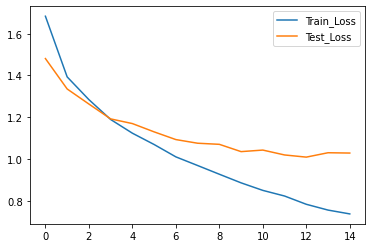

In [19]:
# plot the train and test loss per iteration
plt.plot(train_losses, label="Train_Loss")
plt.plot(test_losses, label="Test_Loss")
plt.legend()
plt.show()

In [20]:
## accuracy
n_correct = 0
n_total = 0

for inputs, targets in train_loader:
  ## move data to gpu
  inputs, targets = inputs.to(device), targets.to(device)

  ## forward pass
  outputs = model(inputs)

  ## get the prediction
  ## torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1) 

  ## update the counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0
n_total = 0

for inputs, targets in test_loader:
  ## move data to gpu
  inputs, targets = inputs.to(device), targets.to(device)

  ## forward pass
  outputs = model(inputs)

  ## get the prediction
  ## torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1) 

  ## update the counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total


print(f"Train acc: {train_acc:.4f}, Test_acc: {test_acc:.4f}")

Train acc: 0.7492, Test_acc: 0.6514


In [21]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion_matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    Normalization can be applied by normalize=True
    """
    if normalize:
        cm  = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")
        
    print(cm)
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = ".2f" if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = "center",
                color="white" if cm[i,j]>thresh else "black" )
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion matrix without normalization
[[752  17  60  14  23   5  13  10  77  29]
 [ 55 727  16  17   4   4  12   5  48 112]
 [ 83   4 596  73  73  50  71  30  17   3]
 [ 34   7 104 513  60 148  67  34  17  16]
 [ 36   0 130  69 559  54  67  72  12   1]
 [ 23   3  93 274  38 495  21  35  10   8]
 [  9   5  73  88  55  27 718   7  12   6]
 [ 23   6  44  53  78  73  11 686   4  22]
 [113  27  25  19   6   8   9   6 771  16]
 [ 58  91  23  23   7  13  13  28  57 687]]


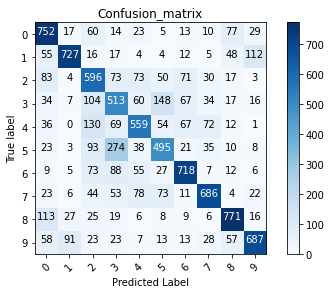

In [22]:
# get all predictions in an array and plot the confusion matrix
import numpy
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])

for inputs, targets in test_loader:
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    
    
    #forward pass
    outputs = model(inputs)
    
    #get prediction
    _, predictions = torch.max(outputs, 1)
    
    # update p test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
# label mapping
labels = '''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck

'''.split()

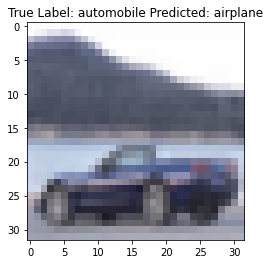

In [26]:
p_test = p_test.astype(np.uint8)
mis_class_idx = np.where(p_test != y_test)[0]
i = np.random.choice(mis_class_idx)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

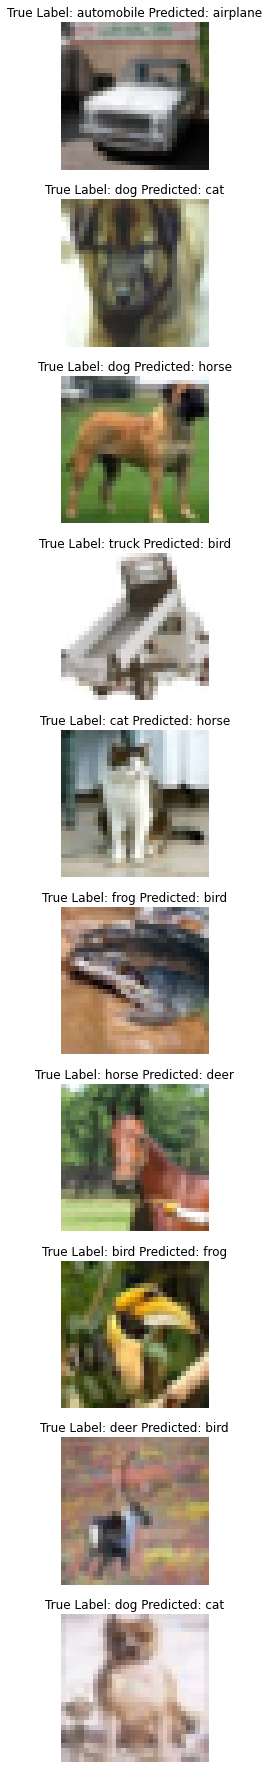

In [27]:
# show some more misclassified samples
p_test = p_test.astype(np.uint8)
mis_class_idx = np.where(p_test != y_test)[0]
sample_idx = np.random.choice(mis_class_idx, 10, replace=False)
plt.figure(figsize=(32, 32))
for j, i in enumerate(sample_idx):
  plt.subplot(10, 1, j+1)
  plt.axis('off')
  plt.imshow(x_test[i].reshape(32, 32, 3))
  plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [28]:
from torchsummary import summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 15, 15]             896
            Conv2d-2             [-1, 64, 7, 7]          18,496
            Conv2d-3            [-1, 128, 3, 3]          73,856
            Linear-4                 [-1, 1024]       1,180,672
            Linear-5                   [-1, 10]          10,250
Total params: 1,284,170
Trainable params: 1,284,170
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.10
Params size (MB): 4.90
Estimated Total Size (MB): 5.01
----------------------------------------------------------------
